<a href="https://colab.research.google.com/github/awagler2/NODE/blob/main/viz_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#import os
#for filename in os.listdir('/content/drive/MyDrive'):
#  print(filename)

Mounted at /content/drive


In [28]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from google.colab import data_table
from vega_datasets import data

# Load dataset
df = pd.read_csv('/content/full_imputed.csv',low_memory=False)
df.columns = df.columns.str.strip().str.lower()

# subset to some variables
subset_variables = ['cc_basic_2000', 'cc_undergrad_2015', 'rev_appropriations_fed', 'rev_appropriations_state', 'rev_grants_contracts_federal', 'rev_grants_contracts_state', 'exp_instruc_total', 'exp_research_total', 'exp_student_serv_total', 'exp_total_current', 'endowment_beg', 'exp_total','total_ft_undergrads','completers','prop.stem']  # List the variables you want to keep
filtered_columns = [col for col in df.columns if col in subset_variables]

#create some new variables
df['revfedpc']=df['rev_appropriations_fed']/df['total_ft_undergrads']
df['revstatepc']=df['rev_appropriations_state']/df['total_ft_undergrads']
df['revgrantspc']=df['rev_grants_contracts_federal']/df['total_ft_undergrads']
df['revgrantsstatepc']=df['rev_grants_contracts_state']/df['total_ft_undergrads']
df['expinstpc']=df['exp_instruc_total']/df['total_ft_undergrads']
df['expresearchpc']=df['exp_research_total']/df['total_ft_undergrads']
df['expstudentservpc']=df['exp_student_serv_total']/df['total_ft_undergrads']
df['exptotalpc']=df['exp_total_current']/df['total_ft_undergrads']
df['endowmentpc']=df['endowment_beg']/df['total_ft_undergrads']
df['exptotalpc']=df['exp_total']/df['total_ft_undergrads']

compute_vars=['revfedpc','revstatepc','revgrantspc','revgrantsstatepc','expinstpc','expresearchpc','expstudentservpc','exptotalpc','endowmentpc','exptotalpc']
subset_variables.extend(compute_vars)
#print(df[subset_variables].head())

print(df['sector'].value_counts())
df.shape

                              cc_basic_2000  \
0  Doctoral/research universities intensive   
1  Doctoral/research universities intensive   
2  Doctoral/research universities intensive   
3  Doctoral/research universities intensive   
4  Doctoral/research universities intensive   

                                 cc_undergrad_2015  rev_appropriations_fed  \
0  Four-year full-time inclusive lower transfer-in               5032605.0   
1  Four-year full-time inclusive lower transfer-in               5032605.0   
2  Four-year full-time inclusive lower transfer-in               5032605.0   
3  Four-year full-time inclusive lower transfer-in               5032605.0   
4  Four-year full-time inclusive lower transfer-in               5032605.0   

   rev_appropriations_state  rev_grants_contracts_federal  \
0                41017088.0                    40702752.0   
1                41017088.0                    40702752.0   
2                41017088.0                    40702752.0   
3   

(5111, 517)

In [61]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['prop.stem'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                        min       max      mean
excellencia_hsi_status                         
Emerging HSI            0.0  0.303371  0.115003
HSI                     0.0  0.340774  0.113244
Not HSI                 0.0  0.420561  0.113971


(3296, 2)


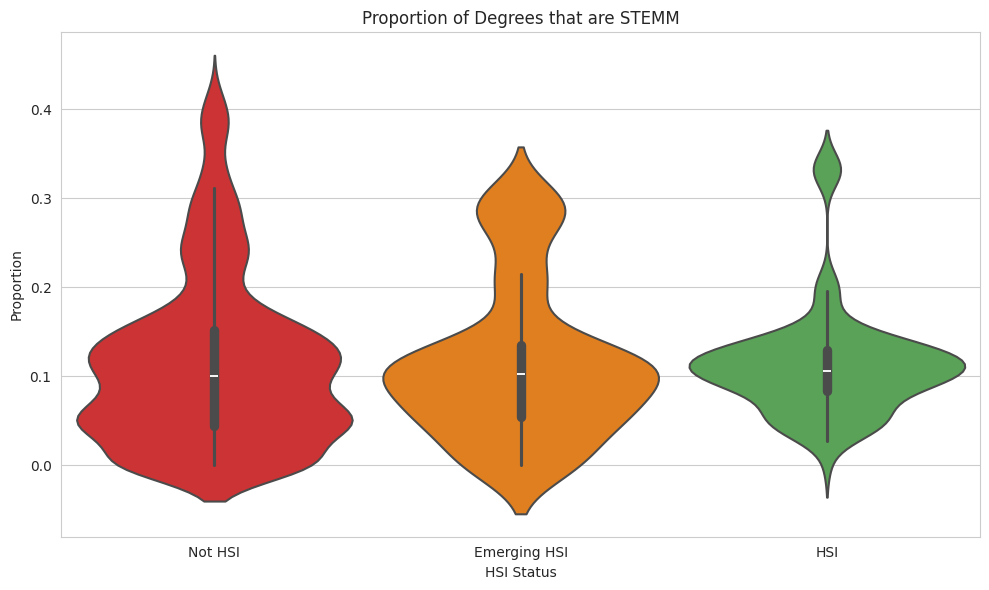

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df[['excellencia_hsi_status', 'prop.stem']].dropna()
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='prop.stem',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Proportion of Degrees that are STEMM')
plt.xlabel('HSI Status')
plt.ylabel('Proportion')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['revfedpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min          max        mean
excellencia_hsi_status                                    
Emerging HSI                  NaN          NaN         NaN
HSI                     35.874312    41.165266   38.255099
Not HSI                 12.376427  3835.397802  809.759077


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['revfedpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min          max        mean
excellencia_hsi_status                                    
Emerging HSI                  NaN          NaN         NaN
HSI                     35.874312    41.165266   38.255099
Not HSI                 12.376427  3835.397802  809.759077


(120, 3)


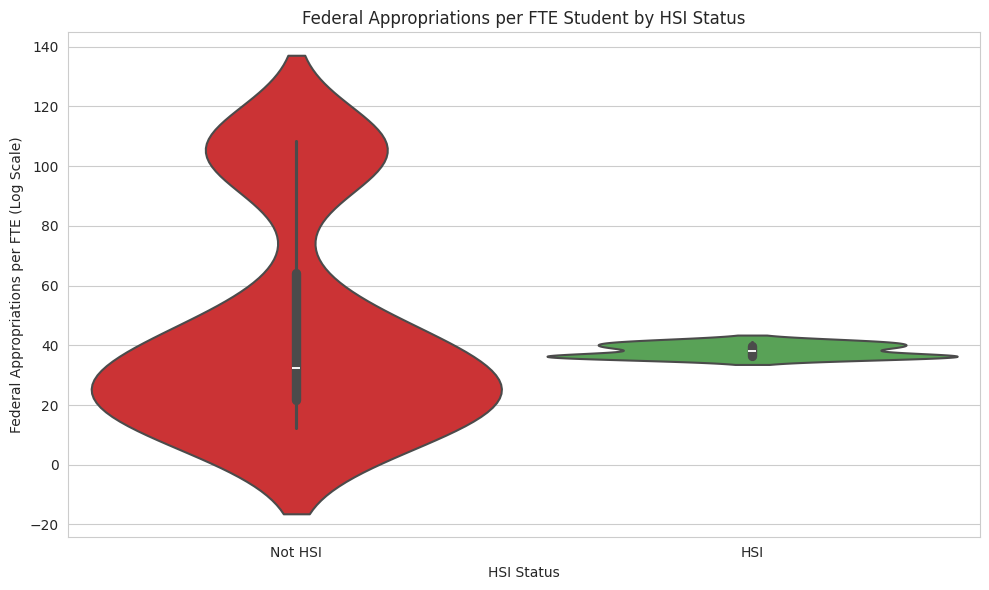

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df[['excellencia_hsi_status', 'revfedpc','rev_appropriations_fed']].dropna()
temp_df = temp_df[temp_df['revfedpc'] < 300]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='revfedpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Federal Appropriations per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Federal Appropriations per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['exptotalpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min          max        mean
excellencia_hsi_status                                    
Emerging HSI            22.237615   354.499038  119.077369
HSI                     11.066415   475.965087   79.040493
Not HSI                 19.459996  3653.920722  194.074232


(2928, 2)


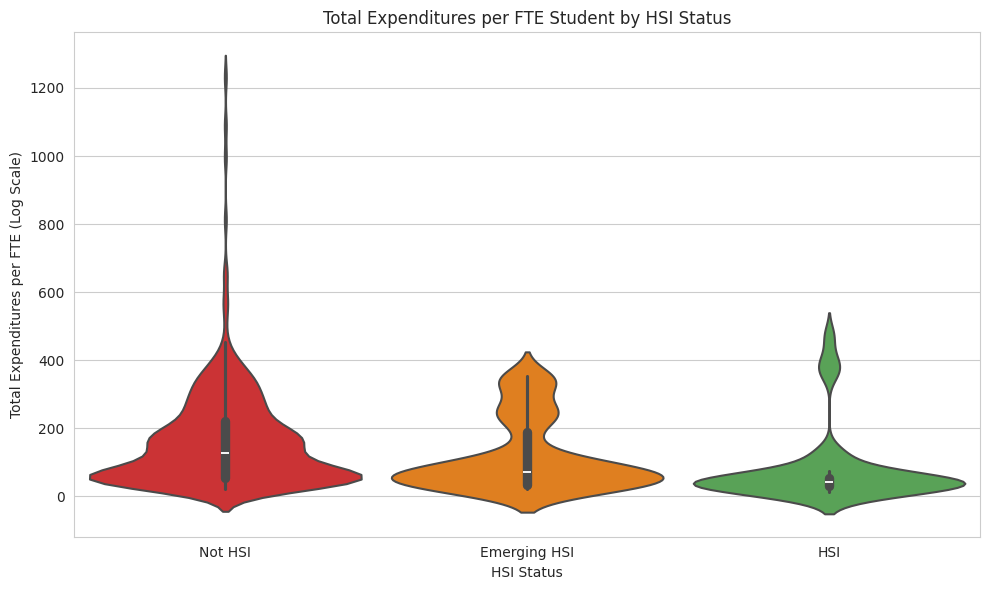

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df[['excellencia_hsi_status', 'exptotalpc']].dropna()
temp_df = temp_df[temp_df['exptotalpc'] < 1500]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='exptotalpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Total Expenditures per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Total Expenditures per FTE (Log Scale)')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

In [45]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['revgrantspc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                               min           max         mean
excellencia_hsi_status                                       
Emerging HSI            104.098742   4536.489388   992.180166
HSI                      17.482342   5138.875691   764.048734
Not HSI                   8.351489  61979.591837  2076.728123


(2960, 2)


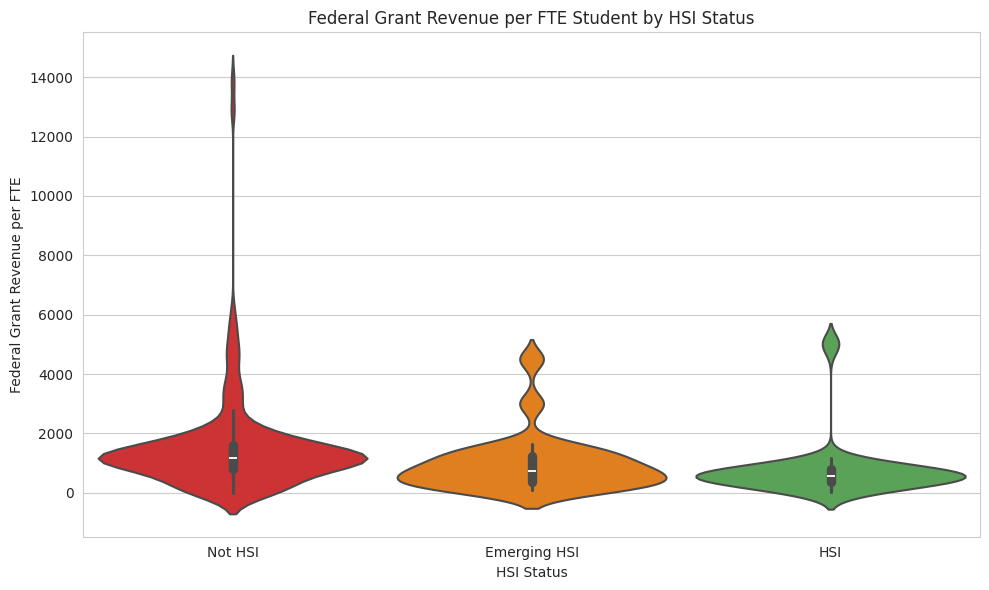

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df[['excellencia_hsi_status', 'revgrantspc']].dropna()
temp_df = temp_df[temp_df['revgrantspc'] < 20000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='revgrantspc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Federal Grant Revenue per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Federal Grant Revenue per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['revgrantsstatepc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                             min           max        mean
excellencia_hsi_status                                    
Emerging HSI            0.151773    718.883326  209.349257
HSI                     0.483553    715.357545  193.997370
Not HSI                 2.712232  24262.951334  643.966413


(2448, 2)


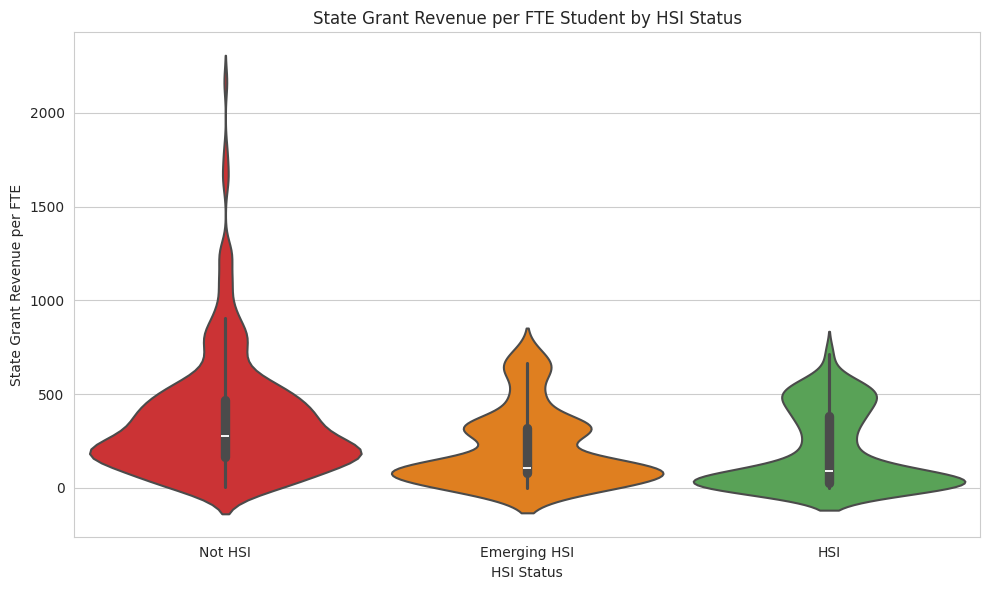

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df[['excellencia_hsi_status', 'revgrantsstatepc']].dropna()
temp_df = temp_df[temp_df['revgrantsstatepc'] < 10000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='revgrantsstatepc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('State Grant Revenue per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('State Grant Revenue per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()

In [49]:
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = df.groupby('excellencia_hsi_status', dropna=True)['endowmentpc'].agg(['min', 'max', 'mean'])

# Display the table
print(summary_stats)

                              min           max          mean
excellencia_hsi_status                                       
Emerging HSI             3.685550  1.028502e+06  33704.541554
HSI                     19.757186  1.131403e+04   1604.273996
Not HSI                  1.039698  1.246519e+05   9621.799191


(2598, 2)


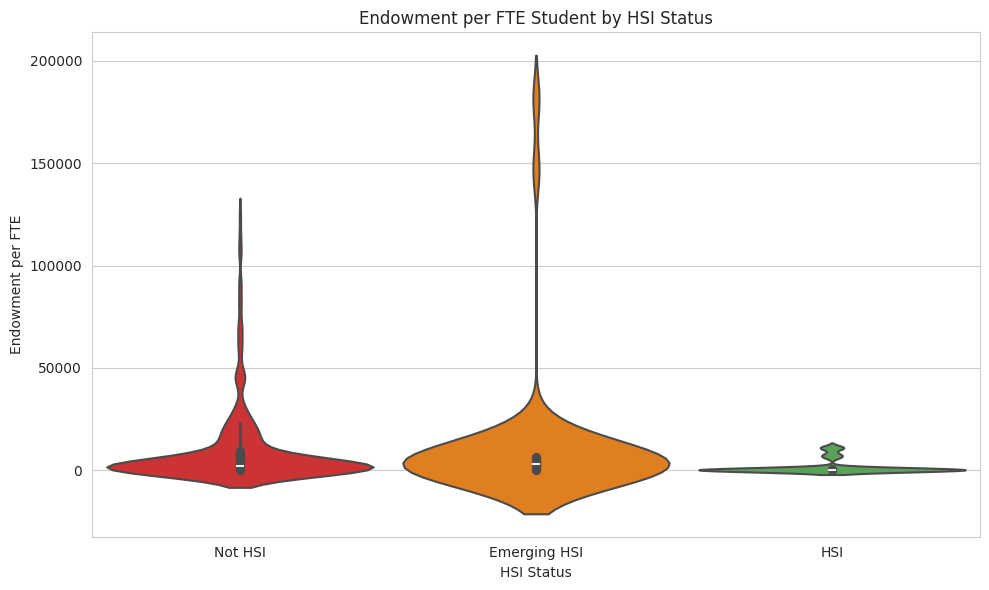

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
temp_df = df[['excellencia_hsi_status', 'endowmentpc']].dropna()
temp_df = temp_df[temp_df['endowmentpc'] < 200000]
print(temp_df.shape)
# Calculate the log value for better visualization if needed
#temp_df['log_revfedpc'] = np.log10(temp_df['revfedpc'])

# Create the violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(
    data=temp_df,
    x='excellencia_hsi_status',
    y='endowmentpc',  # Use log-transformed values for better visualization
    hue='excellencia_hsi_status',
    palette={'Not HSI': '#E41A1C', 'HSI': '#4DAF4A', 'Emerging HSI': '#FF7F00'},  # Set custom colors
    inner='box',  # Show boxplot inside the violin
    width=0.9,
    linewidth=1.5,
    legend=False  # Hide the legend if desired
)

# Customize plot elements (optional)
plt.title('Endowment per FTE Student by HSI Status')
plt.xlabel('HSI Status')
plt.ylabel('Endowment per FTE')
# Add other customizations like y-axis ticks, labels, etc. as needed

plt.tight_layout()
plt.show()